# Assignment 2

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("sales_data.csv")
df.head(60)

,flag,gender,education,house_val,age,online,customer_psy,occupation,mortgage,region,car_prob,fam_income
0,Y,M,4. Grad,75646.0,1_Unk,N,B,Professional,1Low,Midwest,1.0,L
1,N,F,3. Bach,213171.0,7_>65,N,E,Professional,1Low,Northeast,3.0,G
2,N,M,2. Some College,111147.0,2_<=25,Y,C,Professional,1Low,Midwest,1.0,J
3,Y,M,2. Some College,354151.0,2_<=25,Y,B,Sales/Service,1Low,West,2.0,L
4,Y,F,2. Some College,11787.0,1_Unk,Y,J,Sales/Service,1Low,South,7.0,H
5,Y,F,3. Bach,248694.0,6_<=65,Y,B,Professional,2Med,West,1.0,G
6,Y,M,3. Bach,2.0,1_Unk,Y,A,Professional,1Low,Northeast,5.0,C
7,N,F,3. Bach,416925.0,5_<=55,Y,C,Professional,1Low,South,2.0,I
8,N,F,1. HS,27676.0,4_<=45,Y,G,Blue Collar,1Low,West,5.0,D
9,Y,M,1. HS,24138.0,1_Unk,Y,C,Sales/Service,1Low,Northeast,6.0,G


1.Importing all the necessary libraries.
2.Load the date file in df using "read_csv"

In [19]:
df.shape

(40000, 12)

Shows the dimensions of dataframe (rows,columns)

In [20]:
df.columns

Index(['flag', 'gender', 'education', 'house_val', 'age', 'online',
       'customer_psy', 'occupation', 'mortgage', 'region', 'car_prob',
       'fam_income'],
      dtype='object')

Gives the list of columns in dataframe

In [21]:
df.isnull().sum()

flag               0
gender             0
education        741
house_val       7696
age                0
online             0
customer_psy       0
occupation         0
mortgage           0
region             0
car_prob         127
fam_income         0
dtype: int64

Returns the number of missing values in the data set.

In [22]:
df.describe()

,house_val,car_prob
count,3.230400e+04,39873.000000
mean,1.993657e+05,3.502270
std,3.429706e+05,2.574268
min,1.000000e+00,1.000000
25%,1.936500e+04,1.000000
50%,7.782600e+04,3.000000
75%,2.696110e+05,5.000000
max,9.999999e+06,9.000000


used to view some basic statistical details

In [23]:
df.dtypes

flag             object
gender           object
education        object
house_val       float64
age              object
online           object
customer_psy     object
occupation       object
mortgage         object
region           object
car_prob        float64
fam_income       object
dtype: object

checks the data type of all columns

In [24]:
missing_columns = [col for col in df.columns if df[col].isnull().any()]
missingvalues_count = df.isna().sum()
missingvalues_df = pd.DataFrame (missingvalues_count.rename('Null values count')).loc[missingvalues_count.ne(0)]
missingvalues_df.style.background_gradient(cmap="tab20c")



,Null values count
education,741
house_val,7696
car_prob,127


shows the columns with missing values

# Filling the missing values

In [30]:
df['education'] = df['education'].replace(np.nan,df['education'].mode()[0])
df['house_val'] = df['house_val'].replace(np.nan,df['house_val'].mean())
df['car_prob'] = df['car_prob'].replace(np.nan,df['car_prob'].mode()[0])
df.isnull().sum()

flag            0
gender          0
education       0
house_val       0
age             0
online          0
customer_psy    0
occupation      0
mortgage        0
region          0
car_prob        0
fam_income      0
dtype: int64

1) missing values in 'education' filled with mode of value in 'education'
2) missing values in 'house_val' filled with mean of value in 'house_val'
3) missing values in 'car_prob' filled with mode of value in 'car_prob'

# Detect and remove outliers

What is an Outlier?

An outlier is a data point in a data set that is distant from all other observation.

199365.686354631

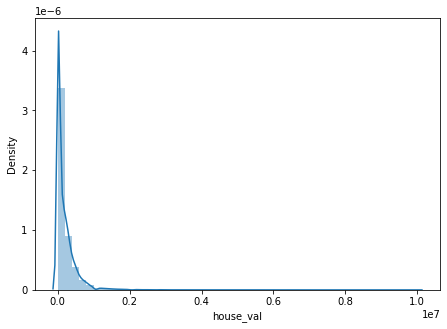

In [44]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
"""The subplot () function takes three arguments that describes 
the layout of the figure. The layout is organized in rows and columns,
which are represented by the first and second argument. 
The third argument represents the index of the current plot. plt.subplot (1, 2, 1) 
#the figure has 1 row, 2 columns, and this plot is the first plot.
*/"""
plt.subplot(1,2,1)
import seaborn as sns
sns.distplot(df['house_val'])
df['house_val'].mean()


In [46]:
print("Highest allowed",df['house_val'].mean() + 3*df['house_val'].std())
print("Lowest allowed",df['house_val'].mean() - 3*df['house_val'].std())
a=3*df['house_val'].std()
print(a)

Highest allowed 1228277.6316769596
Lowest allowed -829546.2589676975
1028911.9453223285


Finding the highest and lowest allowed values

In [12]:
df[(df['house_val'] > 1124010.78) | (df['house_val'] < -725279.41)]

,flag,gender,education,house_val,age,online,customer_psy,occupation,mortgage,region,car_prob,fam_income
34,Y,M,2. Some College,1151448.0,3_<=35,N,B,Professional,2Med,South,1.0,F
63,Y,M,3. Bach,1383733.0,6_<=65,Y,B,Professional,1Low,South,1.0,K
165,Y,M,4. Grad,1856444.0,5_<=55,Y,C,Professional,1Low,West,6.0,K
195,Y,M,2. Some College,1256225.0,1_Unk,Y,B,Sales/Service,3High,West,1.0,L
363,Y,M,2. Some College,1552846.0,1_Unk,Y,B,Others,3High,South,1.0,L
...,...,...,...,...,...,...,...,...,...,...,...,...
39205,Y,M,2. Some College,2792122.0,4_<=45,Y,C,Professional,3High,West,1.0,J
39436,Y,M,3. Bach,1185375.0,1_Unk,Y,B,Professional,3High,South,1.0,L
39604,N,F,3. Bach,1197692.0,4_<=45,Y,C,Professional,3High,West,1.0,H
39799,Y,M,3. Bach,1547255.0,5_<=55,Y,B,Professional,1Low,Northeast,1.0,L


Showing the outliers.

# Trimming of Outliers

Creating a new df and storing the values except outliers in it.

In [13]:
new_df = df[(df['house_val'] < 1124010.78) & (df['house_val'] > -725279.41)]
new_df

,flag,gender,education,house_val,age,online,customer_psy,occupation,mortgage,region,car_prob,fam_income
0,Y,M,4. Grad,75646.000000,1_Unk,N,B,Professional,1Low,Midwest,1.0,L
1,N,F,3. Bach,213171.000000,7_>65,N,E,Professional,1Low,Northeast,3.0,G
2,N,M,2. Some College,111147.000000,2_<=25,Y,C,Professional,1Low,Midwest,1.0,J
3,Y,M,2. Some College,354151.000000,2_<=25,Y,B,Sales/Service,1Low,West,2.0,L
4,Y,F,2. Some College,11787.000000,1_Unk,Y,J,Sales/Service,1Low,South,7.0,H
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,Y,F,3. Bach,199365.686355,7_>65,Y,C,Retired,1Low,South,3.0,F
39996,N,F,1. HS,213596.000000,4_<=45,N,I,Blue Collar,1Low,South,1.0,D
39997,Y,M,. <HS,1347.000000,3_<=35,Y,F,Sales/Service,1Low,Midwest,4.0,E
39998,N,M,1. HS,4221.000000,7_>65,Y,E,Sales/Service,1Low,West,2.0,B


 # Capping on Outliers

In [14]:
upper_limit = df['house_val'].mean() + 3*df['house_val'].std()
lower_limit = df['house_val'].mean() - 3*df['house_val'].std()

In [15]:
df['house_val'] = np.where(
    df['house_val']>upper_limit,
    upper_limit,
    np.where(
        df['house_val']<lower_limit,
        lower_limit,
        df['house_val']
    )
)

In [16]:
df['house_val'].describe()

count    4.000000e+04
mean     1.881645e+05
std      2.139570e+05
min      1.000000e+00
25%      2.659500e+04
50%      1.646600e+05
75%      2.218008e+05
max      1.124011e+06
Name: house_val, dtype: float64